# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
base_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Create endpoint URL with each city
city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
print(city_url)

https://api.openweathermap.org/data/2.5/weather?q=jamestown&appid=16480f47bd34123d151947ae5e57e970&units=metric


In [24]:
# Run a request to the endpoint and convert to json
weather_data= requests.get(city_url).json()
print(weather_data)

{'coord': {'lon': -79.2353, 'lat': 42.097}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 5.74, 'feels_like': 3.72, 'temp_min': 4.2, 'temp_max': 6.68, 'pressure': 1027, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 360}, 'clouds': {'all': 100}, 'dt': 1699716965, 'sys': {'type': 2, 'id': 2008828, 'country': 'US', 'sunrise': 1699704113, 'sunset': 1699740007}, 'timezone': -18000, 'id': 5122534, 'name': 'Jamestown', 'cod': 200}


In [23]:
# print pretty the json (so I can view for traversing for data)
print(json.dumps(weather_data, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.097,
        "lon": -79.2353
    },
    "dt": 1699716965,
    "id": 5122534,
    "main": {
        "feels_like": 3.72,
        "humidity": 76,
        "pressure": 1027,
        "temp": 5.74,
        "temp_max": 6.68,
        "temp_min": 4.2
    },
    "name": "Jamestown",
    "sys": {
        "country": "US",
        "id": 2008828,
        "sunrise": 1699704113,
        "sunset": 1699740007,
        "type": 2
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 2.57
    }
}


In [29]:
# Set the API base URL
base_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marsa alam
Processing Record 2 of Set 1 | margate
Processing Record 3 of Set 1 | acajutla
Processing Record 4 of Set 1 | quellon
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | mahibadhoo
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | labrador city
Processing Record 10 of Set 1 | badger
Processing Record 11 of Set 1 | bardai
Processing Record 12 of Set 1 | inhambane
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | pogar
Processing Record 15 of Set 1 | pitimbu
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | smithers
Processing Record 20 of Set 1 | nova vicosa
Processing Record 21 of Set 1 | vicente guerrero
Processing Record 22 of Set 1 | constantia
Pr

Processing Record 38 of Set 4 | heihe
Processing Record 39 of Set 4 | puerto palomas
Processing Record 40 of Set 4 | brokopondo
Processing Record 41 of Set 4 | huilong
Processing Record 42 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 43 of Set 4 | villa regina
Processing Record 44 of Set 4 | lebu
Processing Record 45 of Set 4 | san antonio de pale
Processing Record 46 of Set 4 | nukunonu
City not found. Skipping...
Processing Record 47 of Set 4 | tazovsky
Processing Record 48 of Set 4 | pisco
Processing Record 49 of Set 4 | concepcion
Processing Record 0 of Set 5 | pionerskiy
Processing Record 1 of Set 5 | qarauyl
Processing Record 2 of Set 5 | la gi
Processing Record 3 of Set 5 | burang
Processing Record 4 of Set 5 | villa ojo de agua
Processing Record 5 of Set 5 | andong
Processing Record 6 of Set 5 | ubari
Processing Record 7 of Set 5 | canasgordas
Processing Record 8 of Set 5 | nikolayevsk-on-amure
Processing Record 9 of Set 5 | katabu
Processing Record 10 of

Processing Record 28 of Set 8 | khadan khak
Processing Record 29 of Set 8 | santyoku
Processing Record 30 of Set 8 | tuni
Processing Record 31 of Set 8 | torghay
Processing Record 32 of Set 8 | ino
Processing Record 33 of Set 8 | katsuura
Processing Record 34 of Set 8 | vanimo
Processing Record 35 of Set 8 | los frentones
Processing Record 36 of Set 8 | midvagur
Processing Record 37 of Set 8 | richards bay
Processing Record 38 of Set 8 | east london
Processing Record 39 of Set 8 | yangambi
Processing Record 40 of Set 8 | celestun
Processing Record 41 of Set 8 | susuman
Processing Record 42 of Set 8 | williams lake
Processing Record 43 of Set 8 | mount gambier
Processing Record 44 of Set 8 | emerald
Processing Record 45 of Set 8 | yigo village
Processing Record 46 of Set 8 | puerto colombia
Processing Record 47 of Set 8 | ras gharib
City not found. Skipping...
Processing Record 48 of Set 8 | springbok
Processing Record 49 of Set 8 | rio grande
Processing Record 0 of Set 9 | la'ie
Proces

Processing Record 19 of Set 12 | orchard homes
Processing Record 20 of Set 12 | ironwood
Processing Record 21 of Set 12 | shubarshi
Processing Record 22 of Set 12 | ryotsu-minato
Processing Record 23 of Set 12 | los llanos de aridane
Processing Record 24 of Set 12 | rakops
Processing Record 25 of Set 12 | maridi
Processing Record 26 of Set 12 | la passe
Processing Record 27 of Set 12 | cheremshan
Processing Record 28 of Set 12 | hafar al-batin
Processing Record 29 of Set 12 | bandon
Processing Record 30 of Set 12 | ta`u
Processing Record 31 of Set 12 | fada
Processing Record 32 of Set 12 | makhambet
Processing Record 33 of Set 12 | jose mariano jimenez
City not found. Skipping...
Processing Record 34 of Set 12 | khash
Processing Record 35 of Set 12 | merizo village
Processing Record 36 of Set 12 | prescott
Processing Record 37 of Set 12 | noumea
Processing Record 38 of Set 12 | hayma'
City not found. Skipping...
Processing Record 39 of Set 12 | ambon
Processing Record 40 of Set 12 | sa

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,marsa alam,25.0757,34.8918,26.04,79,100,2.01,EG,1699722047
1,margate,51.3813,1.3862,7.61,86,20,0.89,GB,1699722135
2,acajutla,13.5928,-89.8275,30.57,63,38,2.17,SV,1699722136
3,quellon,-43.1167,-73.6167,6.92,83,93,8.02,CL,1699722137
4,talnakh,69.4865,88.3972,-11.02,95,100,2.98,RU,1699722138


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marsa alam,25.0757,34.8918,26.04,79,100,2.01,EG,1699722047
1,margate,51.3813,1.3862,7.61,86,20,0.89,GB,1699722135
2,acajutla,13.5928,-89.8275,30.57,63,38,2.17,SV,1699722136
3,quellon,-43.1167,-73.6167,6.92,83,93,8.02,CL,1699722137
4,talnakh,69.4865,88.3972,-11.02,95,100,2.98,RU,1699722138


In [40]:
# Convert datetime to readable date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marsa alam,25.0757,34.8918,26.04,79,100,2.01,EG,2023-11-11
1,margate,51.3813,1.3862,7.61,86,20,0.89,GB,2023-11-11
2,acajutla,13.5928,-89.8275,30.57,63,38,2.17,SV,2023-11-11
3,quellon,-43.1167,-73.6167,6.92,83,93,8.02,CL,2023-11-11
4,talnakh,69.4865,88.3972,-11.02,95,100,2.98,RU,2023-11-11


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

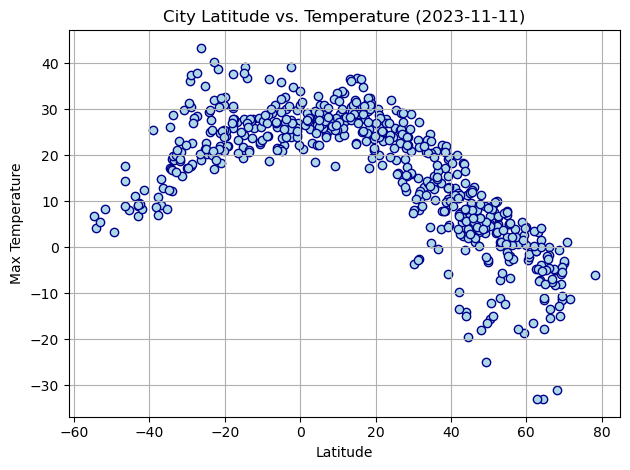

In [41]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='lightblue', edgecolors='darkblue')


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

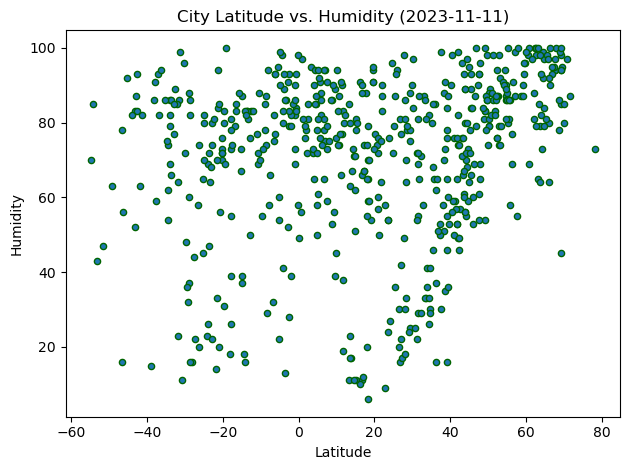

In [43]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='lightgreen', edgecolors='darkgreen')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Humidity ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

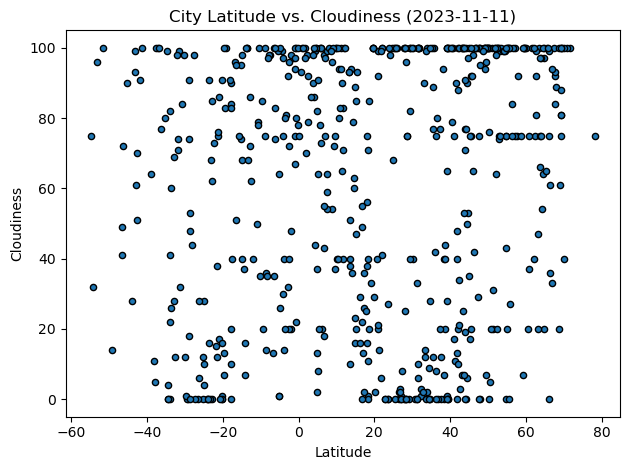

In [78]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='grey', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

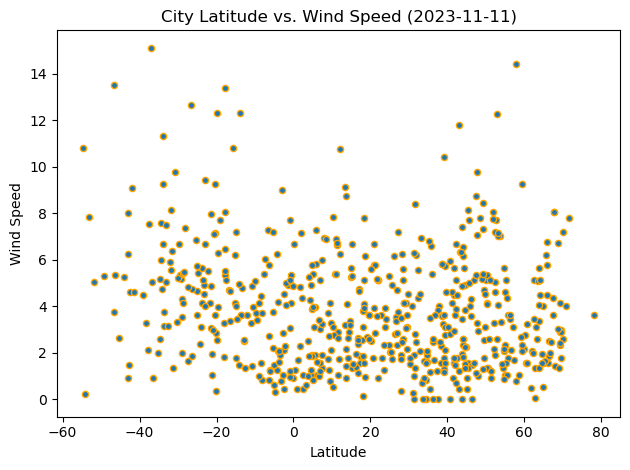

In [80]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='orange', edgecolors='orange')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marsa alam,25.0757,34.8918,26.04,79,100,2.01,EG,2023-11-11
1,margate,51.3813,1.3862,7.61,86,20,0.89,GB,2023-11-11
2,acajutla,13.5928,-89.8275,30.57,63,38,2.17,SV,2023-11-11
4,talnakh,69.4865,88.3972,-11.02,95,100,2.98,RU,2023-11-11
5,mahibadhoo,3.7833,72.9667,28.40,72,90,2.52,MV,2023-11-11


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude <= 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,quellon,-43.1167,-73.6167,6.92,83,93,8.02,CL,2023-11-11
10,inhambane,-23.8650,35.3833,25.00,69,0,4.12,MZ,2023-11-11
11,adamstown,-25.0660,-130.1015,22.60,82,28,4.65,PN,2023-11-11
13,pitimbu,-7.4706,-34.8086,29.33,66,98,6.02,BR,2023-11-11
15,puerto ayora,-0.7393,-90.3518,29.98,84,80,4.92,EC,2023-11-11


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.63x + 34.98
The r-value is: -0.8638139578709945


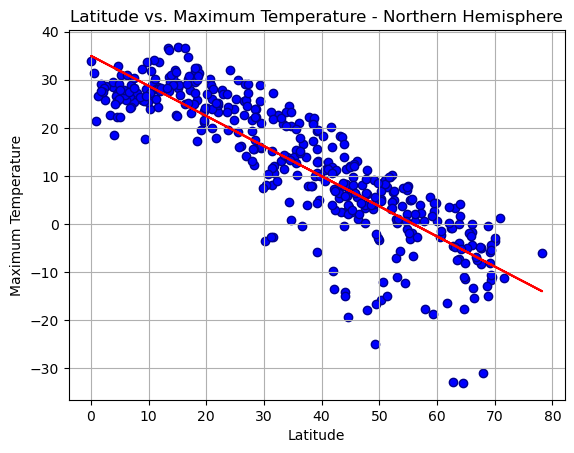

In [70]:
# Linear regression on Northern Hemisphere
# Define a function to create Linear Regression plots
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='blue', edgecolors='darkblue')


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='red')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.36x + 30.95
The r-value is: 0.6262943497225699


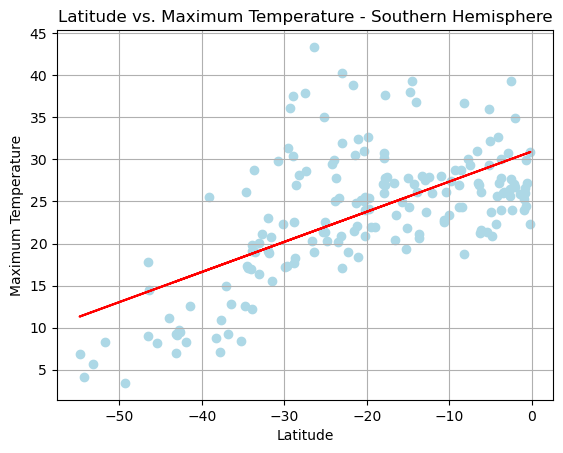

In [72]:

# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='lightblue', edgecolors='lightblue')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The equator is located at 0 degrees latitude. Based on my analysis of the data, the results show that there is a strong negative (inverse) correlation (r= -0.86) in the Northern Hemisphere. As the latitude decreases toward 0, the temperatures rise. In the Southern Hemisphere there is a strong positive (direct) correlation of r= 0.62. As the latitude values move closer to 0, the temperature increases. Based on this data, one could assume that as we move closer to the equator the weather/temperatures will increase.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.33x + 60.43
The r-value is: 0.2943332143607059


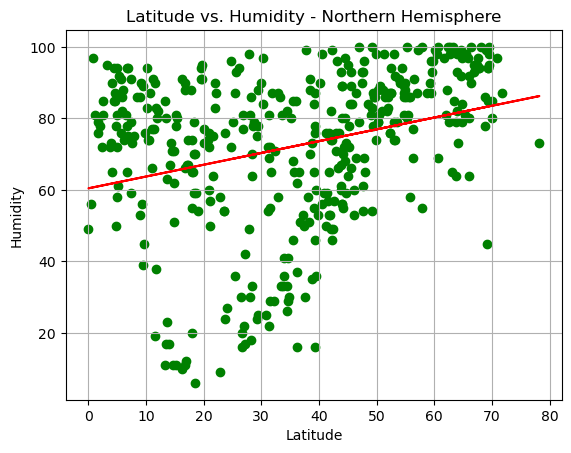

In [73]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='green', edgecolors='green')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.18x + 71.55
The r-value is: 0.10807752803169268


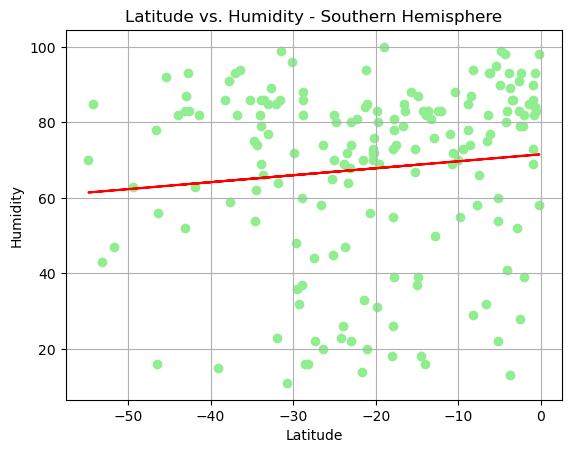

In [75]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='lightgreen', edgecolors='lightgreen')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based on the results of the data, there does not appear to be a strong correlation between latitude and humidity in both the Northern and Southern Hemispheres. There does appear to be a slight correlation in both the North with an r value of 0.29 and an r value of 0.10 in the South. However, the magnitude of these values does not allow us to state that there is a strong relationship. This tells us that the proximity to the equator has no correlation to humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.22x + 54.35
The r-value is: 0.11548689360509186


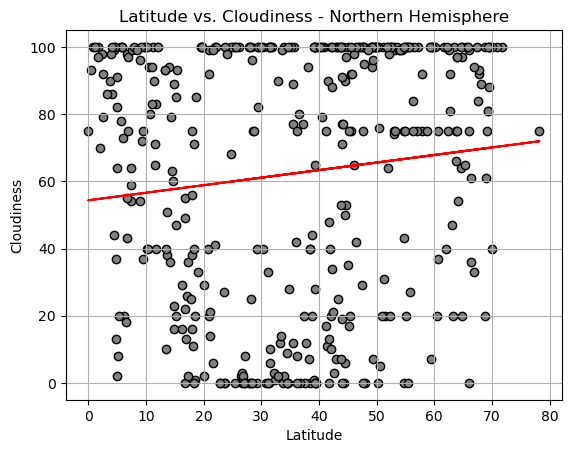

In [77]:
# Northern Hemisphere
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='grey', edgecolors='black')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.32x + 61.42
The r-value is: 0.12158018257492528


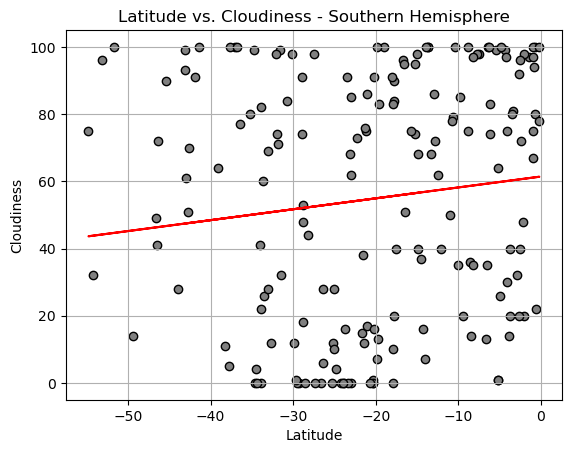

In [79]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='grey', edgecolors='black')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based on the resluts, there is little to no relationship between latitude and cloudiness. The r value for each hemisphere shows a weak positive correlation. The scatter points show that the data is too spread for there to be any reliable correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.01x + 3.29
The r-value is: 0.045545574028851954


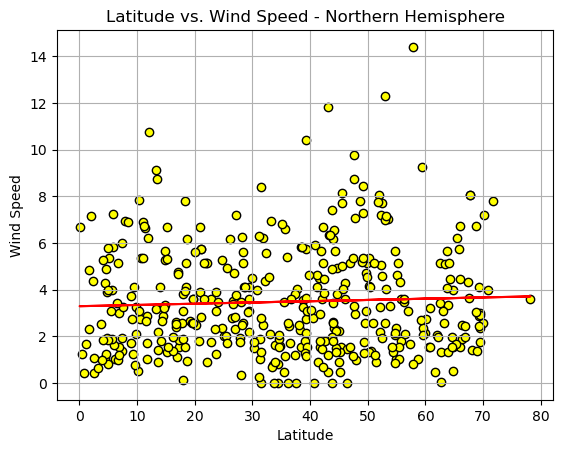

In [84]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='yellow', edgecolors='black')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.06x + 3.38
The r-value is: -0.2923661535509409


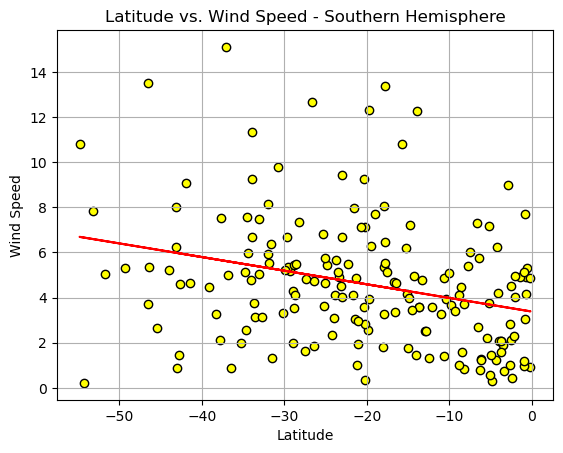

In [85]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='yellow', edgecolors='black')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based on the resluts, there is little to no relationship between latitude and wind speed. The r value for the northern hemisphere is positive and the south is negative but they are both weak correlation. The scattered points show that the data is too spread for there to be any reliable correlation between latitude and wind speed.